In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_venn as vn
import seaborn as sns
import tensorflow as tf

#import custom modules
import sys
sys.path.insert(0,'/Users/frederickkorbel/Documents/projects/paper/mlcis/utils')

import integrated_gradients as ig
import my_utils
from metaplot import Metaplot,one_hot_encode
import plotseqlogo as sql

def count_gc_perc(seq):

    g_count=seq.count('G')
    c_count=seq.count('C')
    gc_perc=((g_count+c_count)/len(seq))*100

    return gc_perc

def gc(dataframe, seq_column='utr'):

    dataframe['gc_perc']=[count_gc_perc(seq) for seq in dataframe[seq_column]]
    
    return dataframe

def u(dataframe, seq_column='utr'):

    dataframe['u_perc']=[(seq.count('T')/len(seq))*100 for seq in dataframe[seq_column]]

    return dataframe

/Users/frederickkorbel/Documents/projects/paper/mlcis/utils/plotseqlogo.py:53: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/Users/frederickkorbel/Documents/projects/paper/mlcis/utils/plotseqlogo.py:54: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


/var/folders/6b/4m6tvsws1rvb767d463fsk7r0000gn/T/ipykernel_11693/329280075.py:5: DtypeWarning: Columns (33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  human_library=pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/seelig/Samples/GSM3130443_designed_library.csv', index_col=[0])


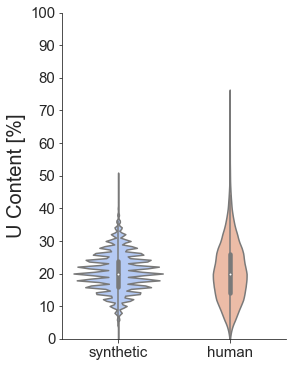

In [2]:
#import the full libraries and count gc content
synthetic_library=gc(pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/seelig/Samples/GSM3130435_egfp_unmod_1.csv', index_col=[0]).sort_values('total', ascending = False).reset_index(drop = True).iloc[:280000])
synthetic_library['dataset']='synthetic'

human_library=pd.read_csv('/Users/frederickkorbel/Documents/projects/paper/seelig/Samples/GSM3130443_designed_library.csv', index_col=[0])
human_library = gc(human_library[(human_library['library'] == 'human_utrs') | (human_library['library'] == 'snv')].sort_values('total', ascending = False).reset_index(drop = True).iloc[:25000])
human_library['dataset']='human'

#add column with u content
synthetic_library=u(synthetic_library)
human_library=u(human_library)

#make a df with gc/u content per library
gc_df=pd.DataFrame({'synthetic':synthetic_library['gc_perc'], 'human':human_library['gc_perc']})
u_df=pd.DataFrame({'synthetic':synthetic_library['u_perc'], 'human':human_library['u_perc']})
libraries=pd.concat([synthetic_library, human_library], ignore_index=True)

#plot
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(4,6))
fig = sns.violinplot(data = u_df, palette = 'coolwarm')
fig.set(ylim=(0,100), yticks = range(0,110,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('U Content [%]', fontsize=20)
sns.despine()

(0.0, 0.004)

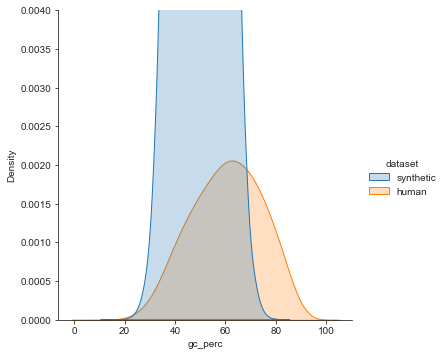

In [3]:

figure=sns.displot(libraries, x='gc_perc', hue='dataset', kind='kde', fill = True, bw_adjust=2)
plt.ylim(0,0.004)


(0.0, 0.004)

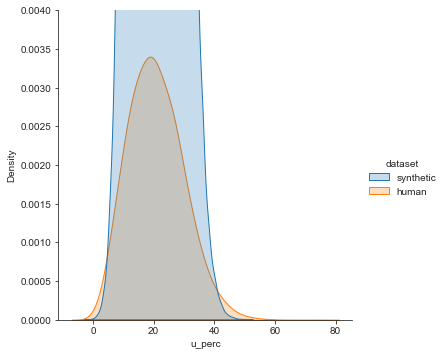

In [15]:
sns.displot(libraries, x='u_perc', hue='dataset', kind='kde', fill = True, bw_adjust=2)
plt.ylim(0,0.004)

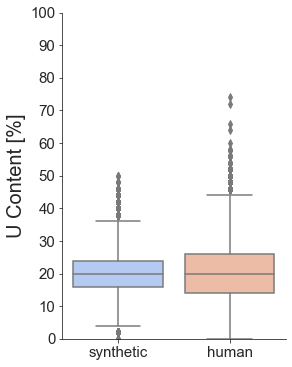

In [12]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(4,6))
fig = sns.boxplot(data = u_df, palette = 'coolwarm')
fig.set(ylim=(0,100), yticks = range(0,110,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('U Content [%]', fontsize=20)
sns.despine()

In [6]:
human_library

,utr,0,1,2,3,4,5,6,7,8,...,info2,info3,info4,library,mother,designed,match_score,gc_perc,dataset,u_perc
0,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,1763,1880,2154,2959,2122,1896,2618,1899,1007,...,chr12:4911298-4911381,snv,normal,snv,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,True,0.0,80.0,human,14.0
1,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,1108,1317,774,1201,1813,2011,3340,2454,1499,...,ENST00000343300,-,-,human_utrs,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,True,0.0,66.0,human,30.0
2,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,1439,1468,1322,1890,1347,1287,2007,2121,1578,...,ENST00000335686,-,-,human_utrs,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,True,0.0,70.0,human,26.0
3,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,952,876,854,1675,2170,1825,2585,1385,733,...,ENST00000279396,-,-,human_utrs,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,True,0.0,80.0,human,12.0
4,CGCCCCACCCCATCCTCCTGCCTTCCCGCGCTCCGGTGTCCCCCGC...,2036,2119,1316,1480,1001,906,1434,1369,710,...,chr20:54173576-54173659,snv,normal,snv,CGCCCCACCCCATCCTCCTGCCTTCCCGCGCTCCGGTGTCCCCCGC...,True,0.0,78.0,human,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,GGCGATGTCGCGGGGCCCTAGGGGAGGAGTTCCACCAGGTGAGAAG...,52,63,159,128,86,57,20,8,9,...,ENST00000530861,-,-,human_utrs,GGCGATGTCGCGGGGCCCTAGGGGAGGAGTTCCACCAGGTGAGAAG...,True,0.0,66.0,human,14.0
24996,CGTTCCTCTTGGATCATGGAGACGTAGCCTTTGCGCCCCTGGGGAA...,48,85,97,118,94,48,46,20,16,...,NaN,NaN,NaN,human_utrs,GGTTCCTCTTGGATCATGGAGACGTAGCCTTTGCGCCCCTGGGGAA...,False,98.0,60.0,human,26.0
24997,GCTCTGGCTGTGCTGTGTTGGCTGTGTTAGGACACTATGTTCCAGG...,34,42,56,97,107,107,46,25,28,...,NaN,NaN,NaN,human_utrs,GCTCTGGCTGTGCTGTGTTGGCTGTGTTGGGACACTATGTTCCAGG...,False,98.0,52.0,human,36.0
24998,CTTTCCGACCTCTGGGGCGCTTGTCCTGCCGTGACCGAGACCTGTC...,37,26,14,24,52,46,85,108,47,...,NaN,NaN,NaN,human_utrs,TCGGATCCTCTGGGCTGCTCGGTCGATGCCTGTGCCACTGACGTCC...,False,76.0,68.0,human,24.0


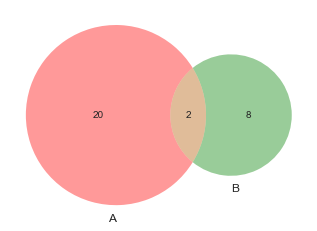

In [7]:
vn.venn2(subsets=(20,8,2))